In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical, vis_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

Using TensorFlow backend.


## DATA Visualization

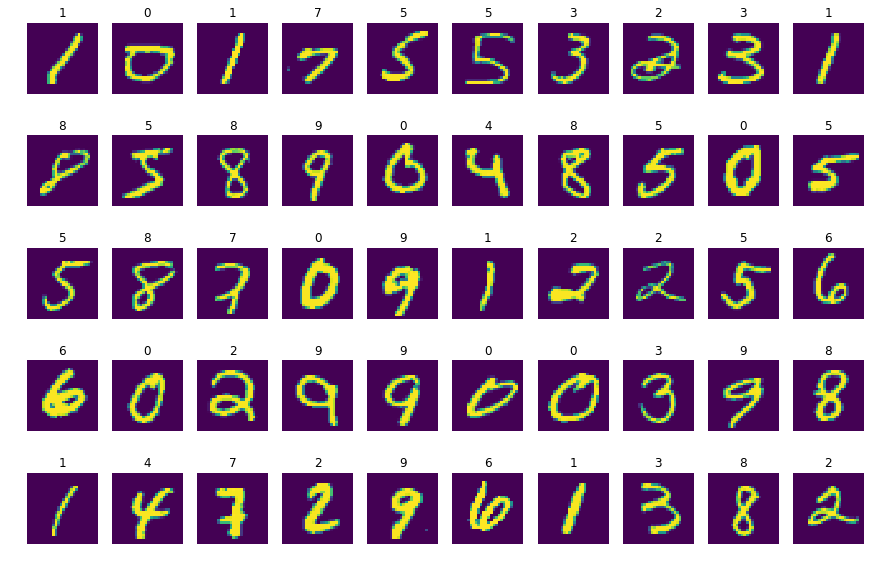

In [2]:
input_units = 784
batch_size = 128
epochs = 50
num_classes = 10

# Import the mnist dataset from Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#visualize the dataset
row, col = 5, 10
idx = np.random.choice(x_train.shape[0], size=row*col, replace=False)
plt.figure(figsize=(15,10))
for i in range(row):
    for j in range(col):
        idx_value = idx[i*col+j]
        plt.subplot(row, col, i*col+j+1)
        plt.title(y_train[idx_value])
        plt.imshow(x_train[idx_value])
        plt.axis("off")



## Performance variation based on the Hidden units

Training samples: 60000
Test samples: 10000
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                19625     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                260       
Total params: 19,885
Trainable params: 19,885
Non-trainable params: 0
_________________________________________________________________


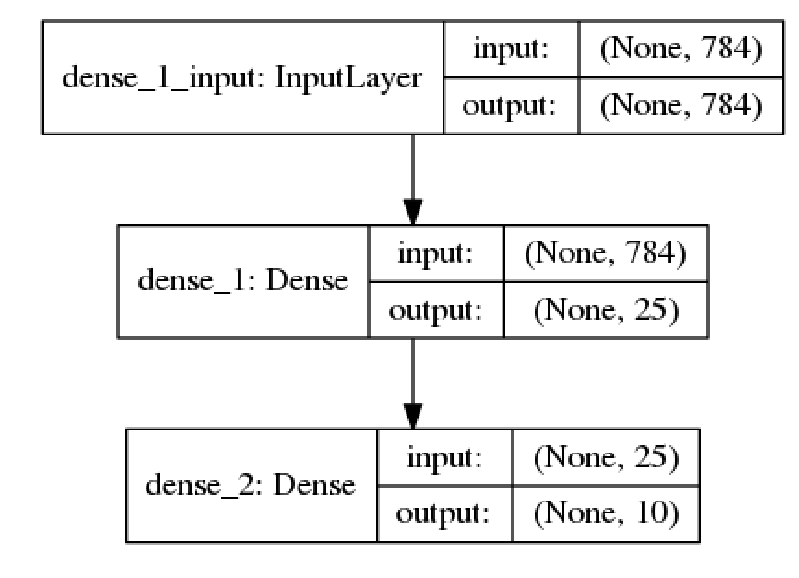

Epoch 1/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.5460 - accuracy: 0.8534
Epoch 2/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.2650 - accuracy: 0.9259
Epoch 3/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.2191 - accuracy: 0.9380
Epoch 4/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.1911 - accuracy: 0.9454
Epoch 5/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.1714 - accuracy: 0.9511
Epoch 6/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.1574 - accuracy: 0.9544
Epoch 7/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.1451 - accuracy: 0.9577
Epoch 8/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.1355 - accuracy: 0.9606
Epoch 9/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.1289 - accuracy: 0.9624
Epoch 10/50
60000/60000 [==============================

array([[8960,   31],
       [  50,  959]])

In [3]:
def generate_model(hidden_units, activation_method, optimizer):
    
    #Neural Network with 3 layers - Input, hidden layer and output layer
    model = Sequential()
    model.add(Dense(hidden_units, activation=activation_method, input_shape=(784,)))
    #model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    #Setting the loss function and metrics
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

x_train = x_train.reshape(x_train.shape[0], input_units)
x_test = x_test.reshape(x_test.shape[0], input_units)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalizing the dataset
x_train /= 255
x_test /= 255

print('Training samples: {}' .format(x_train.shape[0]))
print('Test samples: {}' .format(x_test.shape[0]))

#One-hot vector encoding
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model = generate_model(25, 'relu', 'adam')

#Model visulaization
model.summary()
vis_utils.plot_model(model, show_shapes=True)
plt.figure(figsize=(15,10))
image = plt.imread('model.png')
plt.imshow(image)
plt.axis("off")
plt.show()

#Training the network
train_model = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
print("\n")

# Evaluate the model with the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\nLoss:{:.4f} \t Accuracy: {:.4f}\n'.format(loss, accuracy))

predict = model.predict_classes(x_test)

print("Confusion matrix for {} data".format(x_test.shape[0]))
multilabel_confusion_matrix(np.where(y_test==1)[1], predict)[-1]




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


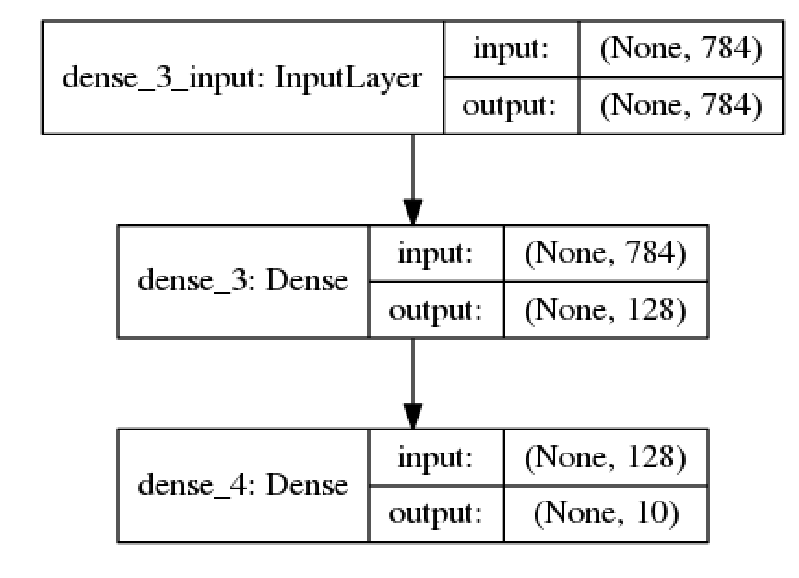

Epoch 1/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.3596 - accuracy: 0.9025
Epoch 2/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.1631 - accuracy: 0.9529
Epoch 3/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.1157 - accuracy: 0.9669
Epoch 4/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.0887 - accuracy: 0.9746
Epoch 5/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.0719 - accuracy: 0.9796
Epoch 6/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.0600 - accuracy: 0.9826
Epoch 7/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.0509 - accuracy: 0.9853
Epoch 8/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.0419 - accuracy: 0.9883
Epoch 9/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.0354 - accuracy: 0.9906
Epoch 10/50
60000/60000 [==============================

array([[8980,   11],
       [  74,  935]])

In [4]:
model = generate_model(128, 'relu', 'adam')

#Model visulaization
model.summary()
vis_utils.plot_model(model, show_shapes=True)
plt.figure(figsize=(15,10))
image = plt.imread('model.png')
plt.imshow(image)
plt.axis("off")
plt.show()

#Training the network
train_model_128 = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
print("\n")

# Evaluate the model with the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\nLoss:{:.4f} \t Accuracy: {:.4f}\n'.format(loss, accuracy))

predict = model.predict_classes(x_test)

print("Confusion matrix for {} data".format(x_test.shape[0]))
multilabel_confusion_matrix(np.where(y_test==1)[1], predict)[-1]

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


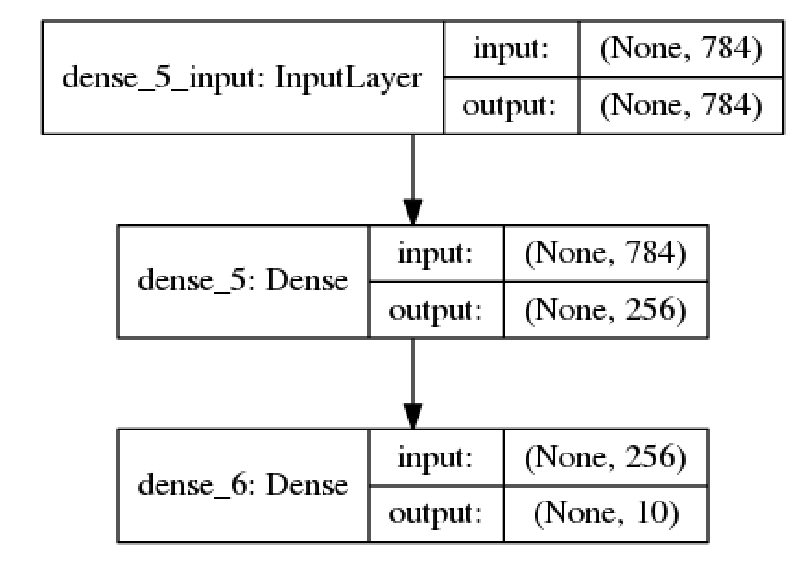

Epoch 1/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.3000 - accuracy: 0.9169
Epoch 2/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.1273 - accuracy: 0.9635
Epoch 3/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.0880 - accuracy: 0.9740
Epoch 4/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.0649 - accuracy: 0.9810
Epoch 5/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.0504 - accuracy: 0.9852
Epoch 6/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.0397 - accuracy: 0.9886
Epoch 7/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.0310 - accuracy: 0.9918
Epoch 8/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.0245 - accuracy: 0.9936
Epoch 9/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.0203 - accuracy: 0.9947
Epoch 10/50
60000/60000 [==============================

array([[8969,   22],
       [  22,  987]])

In [5]:
model = generate_model(256, 'relu', 'adam')

#Model visulaization
model.summary()
vis_utils.plot_model(model, show_shapes=True)
plt.figure(figsize=(15,10))
image = plt.imread('model.png')
plt.imshow(image)
plt.axis("off")
plt.show()

#Training the network
train_model_256 = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
print("\n")

# Evaluate the model with the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\nLoss:{:.4f} \t Accuracy: {:.4f}\n'.format(loss, accuracy))

predict = model.predict_classes(x_test)

print("Confusion matrix for {} data".format(x_test.shape[0]))
multilabel_confusion_matrix(np.where(y_test==1)[1], predict)[-1]

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


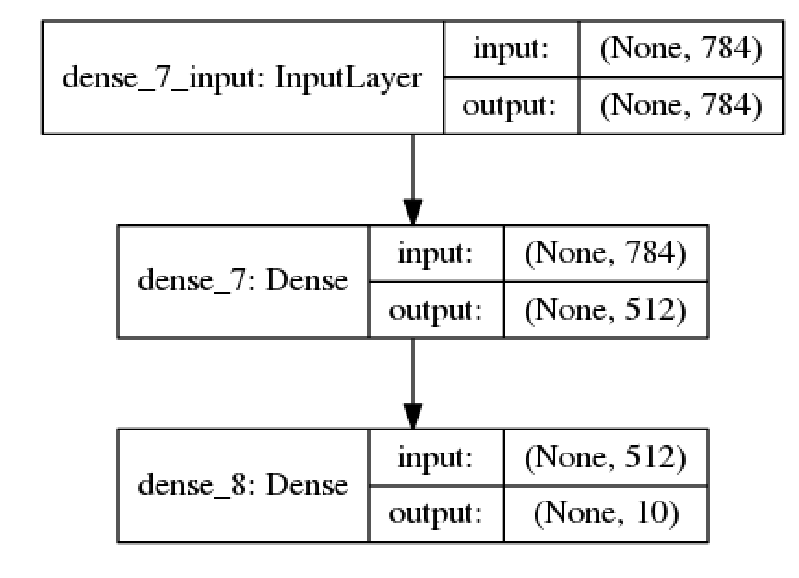

Epoch 1/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.2665 - accuracy: 0.9241
Epoch 2/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.1089 - accuracy: 0.9685
Epoch 3/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.0708 - accuracy: 0.9793
Epoch 4/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.0506 - accuracy: 0.9850
Epoch 5/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.0374 - accuracy: 0.9892
Epoch 6/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.0283 - accuracy: 0.9919
Epoch 7/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.0206 - accuracy: 0.9945
Epoch 8/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.0153 - accuracy: 0.9962
Epoch 9/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.0126 - accuracy: 0.9969
Epoch 10/50
60000/60000 [==============================

array([[8974,   17],
       [  17,  992]])

In [6]:
model = generate_model(512, 'relu', 'adam')

#Model visulaization
model.summary()
vis_utils.plot_model(model, show_shapes=True)
plt.figure(figsize=(15,10))
image = plt.imread('model.png')
plt.imshow(image)
plt.axis("off")
plt.show()

#Training the network
train_model_512 = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
print("\n")

# Evaluate the model with the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\nLoss:{:.4f} \t Accuracy: {:.4f}\n'.format(loss, accuracy))

predict = model.predict_classes(x_test)

print("Confusion matrix for {} data".format(x_test.shape[0]))
multilabel_confusion_matrix(np.where(y_test==1)[1], predict)[-1]

### As the Hidden units number increases the model performance is improved, we are not using dropout therefore the model may tend to overfit for the hidden units greater than 128. So the optimal lies within 25 to 128. Even by increasing the number of layers the performance increases but need to look out for overfitting yet by giving appropriate dropout value we can avoid overfitting (we haven't used dropout for the comaprison purpose). So the optimal can be set as 128 for this work

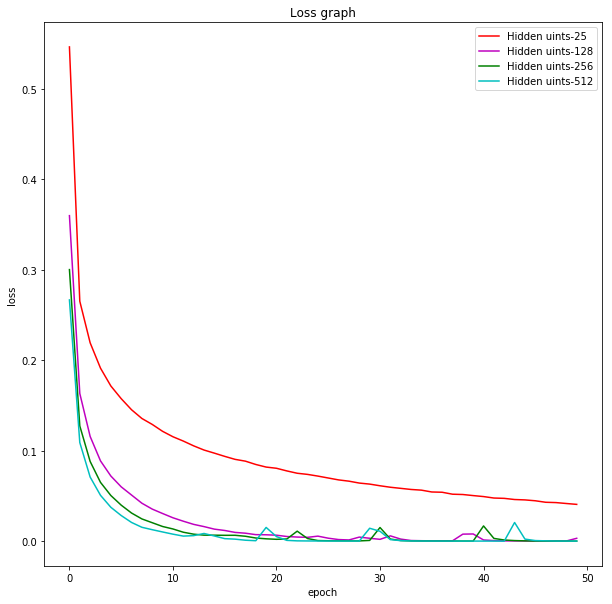

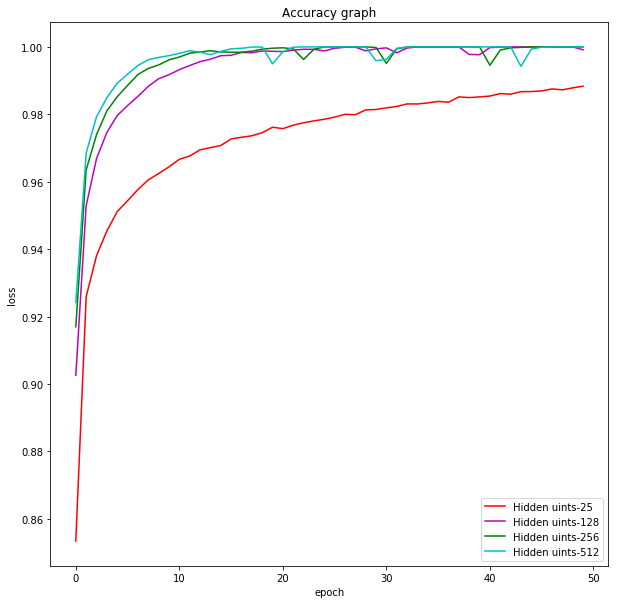

In [7]:
def visualization(x, y, title, color, legend):
  
    plt.plot(x, y, color, label =legend )
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title(title)
    plt.legend()
    plt.grid()
    

plt.figure(figsize=(10,10))
visualization(train_model.epoch, train_model.history['loss'], "Loss graph", 'r', "Hidden uints-25")
visualization(train_model_128.epoch, train_model_128.history['loss'], "Loss graph", 'm', "Hidden uints-128")
visualization(train_model_256.epoch, train_model_256.history['loss'], "Loss graph", 'g', "Hidden uints-256")
visualization(train_model_512.epoch, train_model_512.history['loss'], "Loss graph", 'c', "Hidden uints-512")

plt.show()

plt.figure(figsize=(10,10))
visualization(train_model.epoch, train_model.history['accuracy'], "Accuracy graph", 'r', "Hidden uints-25")
visualization(train_model_128.epoch, train_model_128.history['accuracy'], "Accuracy graph", 'm', "Hidden uints-128")
visualization(train_model_256.epoch, train_model_256.history['accuracy'], "Accuracy graph", 'g', "Hidden uints-256")
visualization(train_model_512.epoch, train_model_512.history['accuracy'], "Accuracy graph", 'c', "Hidden uints-512")

plt.show()

## Performance variation based on the Activation function

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


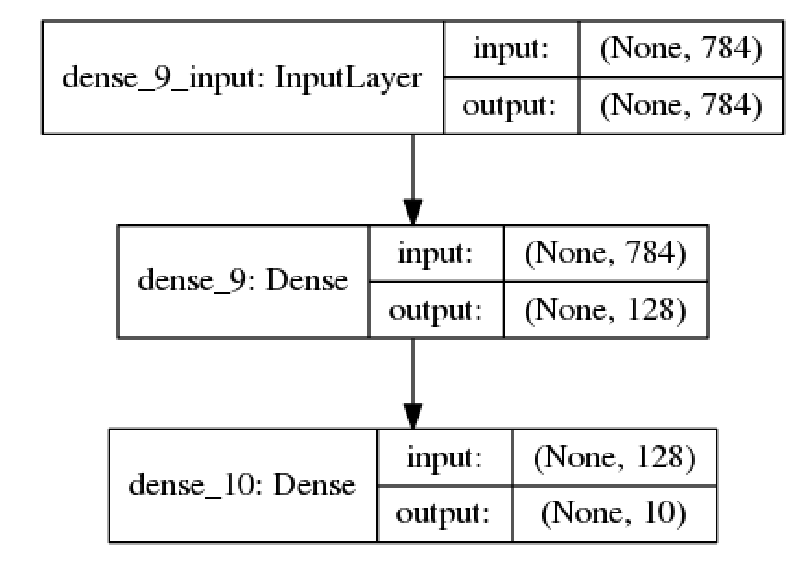

Epoch 1/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.5952 - accuracy: 0.8604
Epoch 2/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.2759 - accuracy: 0.9224
Epoch 3/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.2209 - accuracy: 0.9376
Epoch 4/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.1852 - accuracy: 0.9473
Epoch 5/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.1588 - accuracy: 0.9547
Epoch 6/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.1376 - accuracy: 0.9609
Epoch 7/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.1208 - accuracy: 0.9662
Epoch 8/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.1066 - accuracy: 0.9704
Epoch 9/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0953 - accuracy: 0.9732
Epoch 10/50
60000/60000 [==============================

array([[8974,   17],
       [  37,  972]])

In [8]:
model = generate_model(128, 'sigmoid', 'adam')

#Model visulaization
model.summary()
vis_utils.plot_model(model, show_shapes=True)
plt.figure(figsize=(15,10))
image = plt.imread('model.png')
plt.imshow(image)
plt.axis("off")
plt.show()

#Training the network
train_model_sigmoid = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
print("\n")

# Evaluate the model with the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\nLoss:{:.4f} \t Accuracy: {:.4f}\n'.format(loss, accuracy))

predict = model.predict_classes(x_test)

print("Confusion matrix for {} data".format(x_test.shape[0]))
multilabel_confusion_matrix(np.where(y_test==1)[1], predict)[-1]

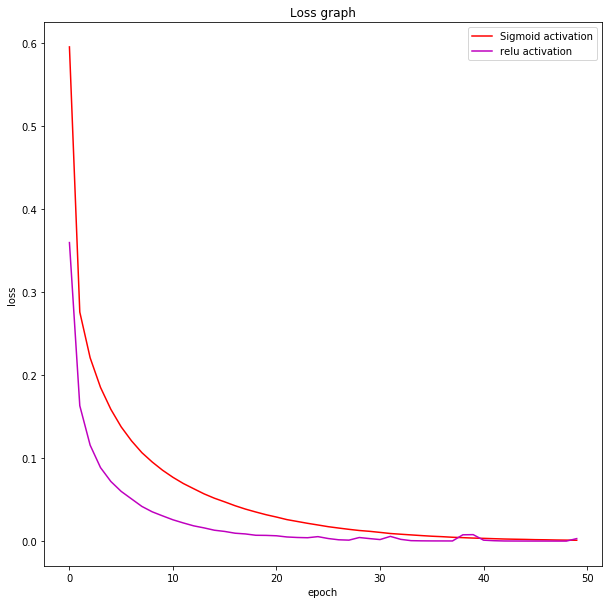

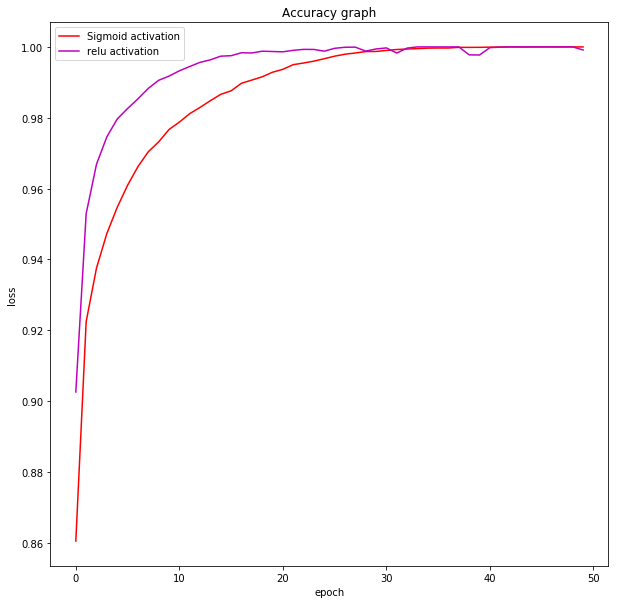

In [9]:
plt.figure(figsize=(10,10))
visualization(train_model_sigmoid.epoch, train_model_sigmoid.history['loss'], "Loss graph", 'r', "Sigmoid activation")
visualization(train_model_128.epoch, train_model_128.history['loss'], "Loss graph", 'm', "relu activation")

plt.show()

plt.figure(figsize=(10,10))
visualization(train_model_sigmoid.epoch, train_model_sigmoid.history['accuracy'], "Accuracy graph", 'r', "Sigmoid activation")
visualization(train_model_128.epoch, train_model_128.history['accuracy'], "Accuracy graph", 'm', "relu activation")

plt.show()

### The sigmoid function gives a smoth curve than the relu, so the optimal for this could be sigmoid function. We can use checkpoint to cut the epoch when relu achieves the required accuracy because relu achieves higher accuracy faster than the sigmoid function. Therefore based on the application it is effiecient to choose the activation function. For this assignment will take sigmoid, since we won't be using checkpoint

## Performance variation based on the Optimizer

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


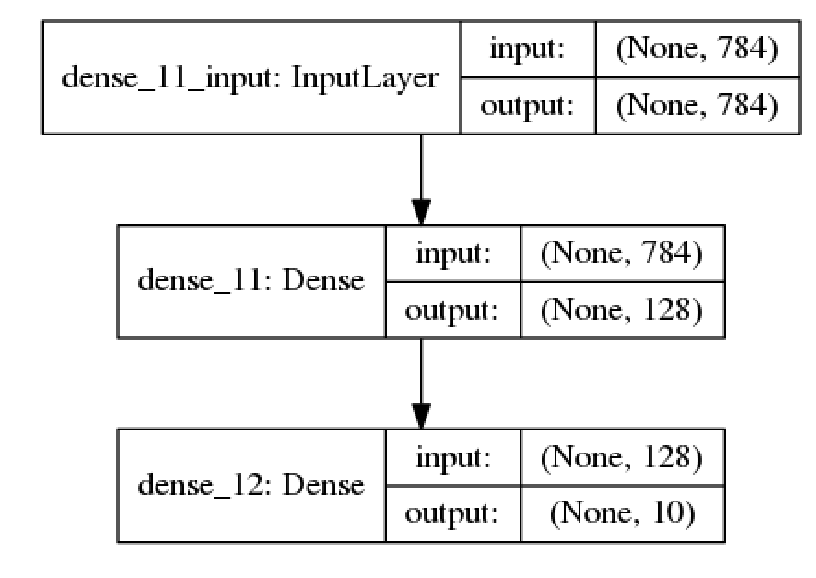

Epoch 1/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.3556 - accuracy: 0.9019
Epoch 2/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1711 - accuracy: 0.9503
Epoch 3/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1263 - accuracy: 0.9639
Epoch 4/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1010 - accuracy: 0.9711
Epoch 5/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.0835 - accuracy: 0.9760
Epoch 6/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.0713 - accuracy: 0.9793
Epoch 7/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.0618 - accuracy: 0.9825
Epoch 8/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.0547 - accuracy: 0.9845
Epoch 9/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.0485 - accuracy: 0.9863
Epoch 10/50
60000/60000 [==============================

array([[8966,   25],
       [  27,  982]])

In [10]:
model = generate_model(128, 'relu', 'adadelta')

#Model visulaization
model.summary()
vis_utils.plot_model(model, show_shapes=True)
plt.figure(figsize=(15,10))
image = plt.imread('model.png')
plt.imshow(image)
plt.axis("off")
plt.show()

#Training the network
train_model_adadelta = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
print("\n")

# Evaluate the model with the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\nLoss:{:.4f} \t Accuracy: {:.4f}\n'.format(loss, accuracy))

predict = model.predict_classes(x_test)

print("Confusion matrix for {} data".format(x_test.shape[0]))
multilabel_confusion_matrix(np.where(y_test==1)[1], predict)[-1]

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


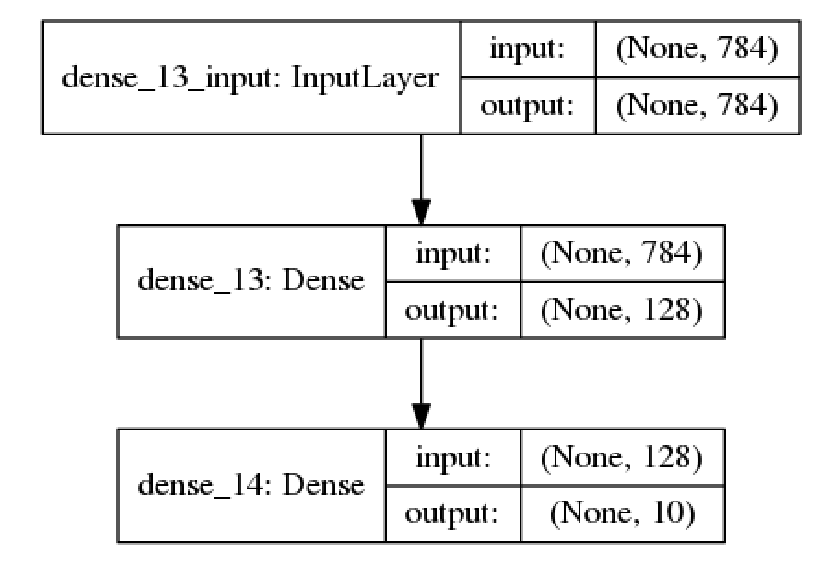

Epoch 1/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.3334 - accuracy: 0.9090
Epoch 2/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.1588 - accuracy: 0.9542
Epoch 3/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.1131 - accuracy: 0.9677
Epoch 4/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0882 - accuracy: 0.9743
Epoch 5/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0714 - accuracy: 0.9793
Epoch 6/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0603 - accuracy: 0.9827
Epoch 7/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0516 - accuracy: 0.9851
Epoch 8/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0434 - accuracy: 0.9876
Epoch 9/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0382 - accuracy: 0.9893
Epoch 10/50
60000/60000 [==============================

array([[8961,   30],
       [  27,  982]])

In [11]:
model = generate_model(128, 'relu', 'RMSprop')

#Model visulaization
model.summary()
vis_utils.plot_model(model, show_shapes=True)
plt.figure(figsize=(15,10))
image = plt.imread('model.png')
plt.imshow(image)
plt.axis("off")
plt.show()

#Training the network
train_model_rms = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
print("\n")

# Evaluate the model with the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\nLoss:{:.4f} \t Accuracy: {:.4f}\n'.format(loss, accuracy))

predict = model.predict_classes(x_test)

print("Confusion matrix for {} data".format(x_test.shape[0]))
multilabel_confusion_matrix(np.where(y_test==1)[1], predict)[-1]

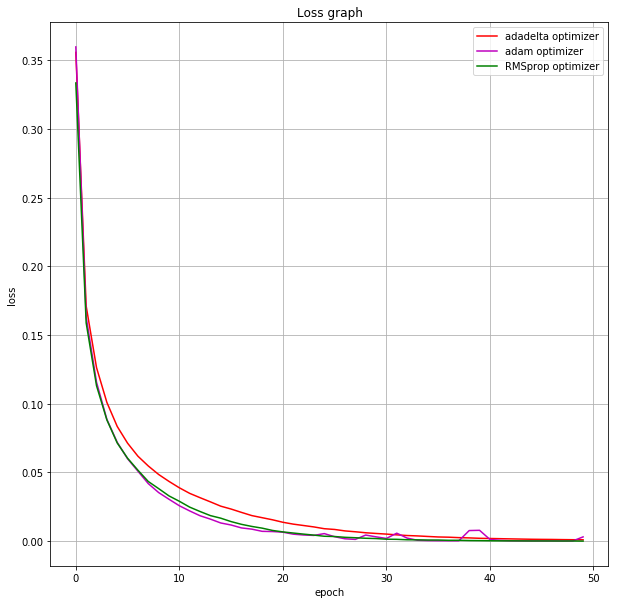

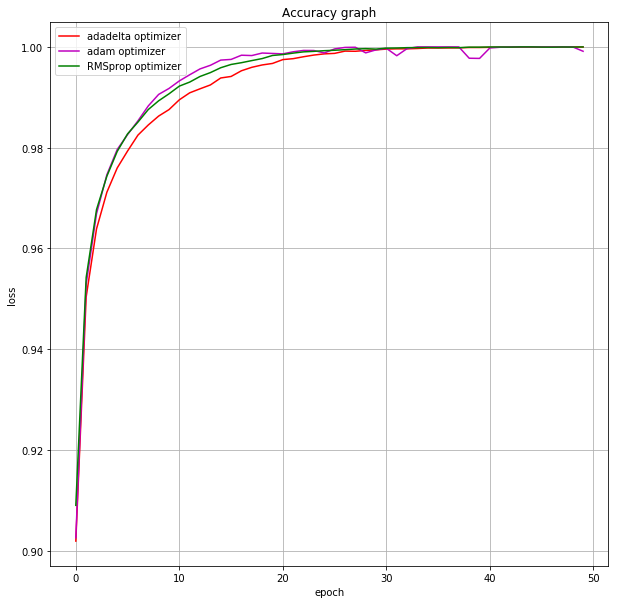

In [12]:
plt.figure(figsize=(10,10))
visualization(train_model_adadelta.epoch, train_model_adadelta.history['loss'], "Loss graph", 'r', "adadelta optimizer")
visualization(train_model_128.epoch, train_model_128.history['loss'], "Loss graph", 'm', "adam optimizer")
visualization(train_model_rms.epoch, train_model_rms.history['loss'], "Loss graph", 'g', "RMSprop optimizer")

plt.show()

plt.figure(figsize=(10,10))
visualization(train_model_adadelta.epoch, train_model_adadelta.history['accuracy'], "Accuracy graph", 'r', "adadelta optimizer")
visualization(train_model_128.epoch, train_model_128.history['accuracy'], "Accuracy graph", 'm', "adam optimizer")
visualization(train_model_rms.epoch, train_model_rms.history['accuracy'], "Accuracy graph", 'g', "RMSprop optimizer")

plt.show()

### Here the optimizer performs more or less the same, eventhough the adam optimiser oscillates it achieves accuracy 1 faster than the other two optimizer. Those oscillation can be removed using the sigmoid activation function. Therefore the optimal optimizer could be adam

## Performance variation based on the batch size

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


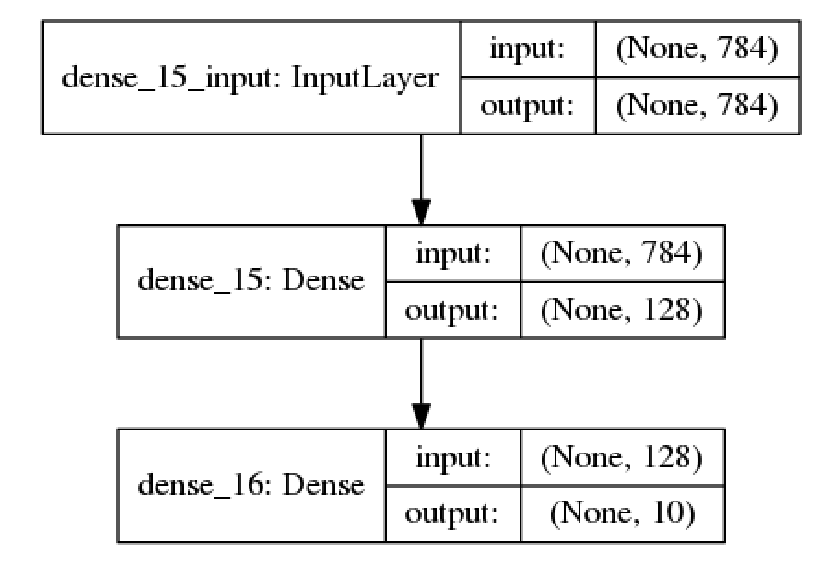

Epoch 1/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.2963 - accuracy: 0.9170
Epoch 2/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1292 - accuracy: 0.9626
Epoch 3/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.0899 - accuracy: 0.9742
Epoch 4/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.0688 - accuracy: 0.9800
Epoch 5/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.0545 - accuracy: 0.9838
Epoch 6/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.0433 - accuracy: 0.9873
Epoch 7/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.0364 - accuracy: 0.9892
Epoch 8/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.0294 - accuracy: 0.9913
Epoch 9/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.0245 - accuracy: 0.9926
Epoch 10/50
60000/60000 [==============================

array([[8964,   27],
       [  20,  989]])

In [13]:
model = generate_model(128, 'relu', 'adam')

#Model visulaization
model.summary()
vis_utils.plot_model(model, show_shapes=True)
plt.figure(figsize=(15,10))
image = plt.imread('model.png')
plt.imshow(image)
plt.axis("off")
plt.show()

#Training the network
train_model_b64 = model.fit(x_train, y_train, epochs=epochs, batch_size=64, verbose=1)
print("\n")

# Evaluate the model with the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\nLoss:{:.4f} \t Accuracy: {:.4f}\n'.format(loss, accuracy))

predict = model.predict_classes(x_test)

print("Confusion matrix for {} data".format(x_test.shape[0]))
multilabel_confusion_matrix(np.where(y_test==1)[1], predict)[-1]

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


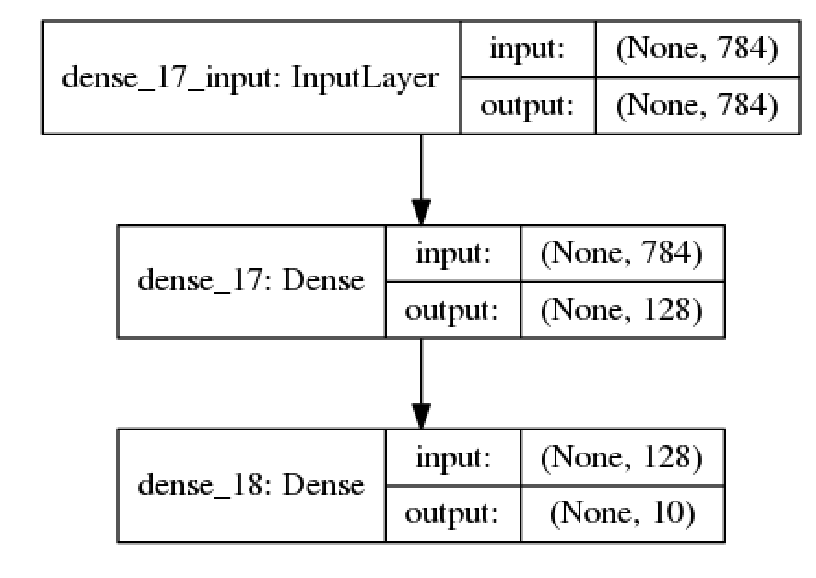

Epoch 1/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.2592 - accuracy: 0.9268
Epoch 2/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.1111 - accuracy: 0.9670
Epoch 3/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.0747 - accuracy: 0.9776
Epoch 4/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.0562 - accuracy: 0.9826
Epoch 5/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.0430 - accuracy: 0.9871
Epoch 6/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.0350 - accuracy: 0.9890
Epoch 7/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.0271 - accuracy: 0.9916
Epoch 8/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.0238 - accuracy: 0.9924
Epoch 9/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.0195 - accuracy: 0.9939
Epoch 10/50
60000/60000 [==============================

array([[8975,   16],
       [  42,  967]])

In [14]:
model = generate_model(128, 'relu', 'adam')

#Model visulaization
model.summary()
vis_utils.plot_model(model, show_shapes=True)
plt.figure(figsize=(15,10))
image = plt.imread('model.png')
plt.imshow(image)
plt.axis("off")
plt.show()

#Training the network
train_model_b32 = model.fit(x_train, y_train, epochs=epochs, batch_size=32, verbose=1)
print("\n")

# Evaluate the model with the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\nLoss:{:.4f} \t Accuracy: {:.4f}\n'.format(loss, accuracy))

predict = model.predict_classes(x_test)

print("Confusion matrix for {} data".format(x_test.shape[0]))
multilabel_confusion_matrix(np.where(y_test==1)[1], predict)[-1]

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


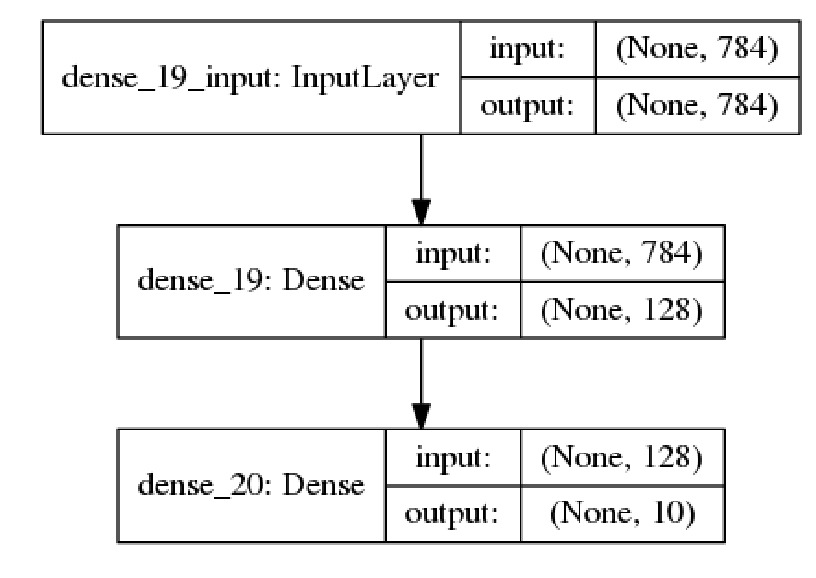

Epoch 1/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.4469 - accuracy: 0.8764
Epoch 2/50
60000/60000 [==============================] - 1s 9us/step - loss: 0.2076 - accuracy: 0.9421
Epoch 3/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.1547 - accuracy: 0.9559
Epoch 4/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.1223 - accuracy: 0.9652
Epoch 5/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.1009 - accuracy: 0.9716
Epoch 6/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.0847 - accuracy: 0.9763
Epoch 7/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.0726 - accuracy: 0.9794
Epoch 8/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.0628 - accuracy: 0.9825
Epoch 9/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.0544 - accuracy: 0.9853
Epoch 10/50
60000/60000 [==============================]

In [ ]:
model = generate_model(128, 'relu', 'adam')

#Model visulaization
model.summary()
vis_utils.plot_model(model, show_shapes=True)
plt.figure(figsize=(15,10))
image = plt.imread('model.png')
plt.imshow(image)
plt.axis("off")
plt.show()

#Training the network
train_model_b256 = model.fit(x_train, y_train, epochs=epochs, batch_size=256, verbose=1)
print("\n")

# Evaluate the model with the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\nLoss:{:.4f} \t Accuracy: {:.4f}\n'.format(loss, accuracy))

predict = model.predict_classes(x_test)

print("Confusion matrix for {} data".format(x_test.shape[0]))
multilabel_confusion_matrix(np.where(y_test==1)[1], predict)[-1]

In [ ]:
plt.figure(figsize=(10,10))
visualization(train_model_b32.epoch, train_model_b32.history['loss'], "Loss graph", 'r', "batch size-32")
visualization(train_model_b64.epoch, train_model_b64.history['loss'], "Loss graph", 'm', "batch size-64")
visualization(train_model_128.epoch, train_model_128.history['loss'], "Loss graph", 'g', "batch size-128")
visualization(train_model_b256.epoch, train_model_b256.history['loss'], "Loss graph", 'c', "batch size-256")

plt.show()

plt.figure(figsize=(10,10))
visualization(train_model_b32.epoch, train_model_b32.history['accuracy'], "Accuracy graph", 'r', "batch size-32")
visualization(train_model_b64.epoch, train_model_b64.history['accuracy'], "Accuracy graph", 'm', "batch size-64")
visualization(train_model_128.epoch, train_model_128.history['accuracy'], "Accuracy graph", 'g', "batch size-128")
visualization(train_model_b256.epoch, train_model_b256.history['accuracy'], "Accuracy graph", 'c', "batch size-256")

plt.show()

### Higher batch size 128 and 256 sweeps fast to the high accuracy value but the graph is oscillating, whereas 32 and 64 takes time to settle but doesn't oscillate. So the optimal batch size could be 64

## Using the optimal parameter found from the above experiment

Optimizer = adam, activation function = sigmoid, hidden units = 128, batch_size = 64

In [ ]:
model = generate_model(128, 'sigmoid', 'adam')

#Model visulaization
model.summary()
vis_utils.plot_model(model, show_shapes=True)
plt.figure(figsize=(15,10))
image = plt.imread('model.png')
plt.imshow(image)
plt.axis("off")
plt.show()

#Training the network
train_model_optimal = model.fit(x_train, y_train, epochs=epochs, batch_size=64, verbose=1)
print("\n")

# Evaluate the model with the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\nLoss:{:.4f} \t Accuracy: {:.4f}\n'.format(loss, accuracy))

predict = model.predict_classes(x_test)

print("Confusion matrix for {} data".format(x_test.shape[0]))
multilabel_confusion_matrix(np.where(y_test==1)[1], predict)[-1]

In [ ]:
plt.figure(figsize=(10,10))
visualization(train_model_optimal.epoch, train_model_optimal.history['loss'], "Loss graph", 'r', 'Loss')

plt.show()

plt.figure(figsize=(10,10))
visualization(train_model_optimal.epoch, train_model_optimal.history['accuracy'], "Accuracy graph", 'g', 'Accuracy')


plt.show()

### We have obtained a very smooth curve based on the optimal parameter found in our trail and error experiment